# Perceptron
* Lets now look at the famous perceptron algorithm
* this is seen as the precursor to neural networks
* This is a **linear binary classifier**

# History
* invented in 1957 by Rosenblatt
* originally was designed for image recognition
* Lead to a great deal of excitement for AI
* Famous for not being able to solve XOR 
* Caused significant decline in interest

# Theory - Limitations of our problem
* Setup:
* Perceptrons only handle Binary classification
* Instead of using targets = {0, 1}, we will use targets = {-1, +1}
* This is very convenient and can be seen in training

# Prediction
* prediction with a perceptron is very simple! It is just like any other linear classifier
* We simply take the input x, comput the dot product of it with the weights, and add the bias b
### $$w^Tx+b$$
* if $w^Tx+b = 0$ we fall directly on the line/hyperplane
* if $w^Tx+b > 0$ we predict +1
* if $w^Tx+b < 0$ we predict -1
* in other words, our prediction is:
### $$sign(w^Tx+b)$$

# Perceptron Training
* Training with the perceptron is the interesting part
* It is an iterative procedure, meaning we go through a for loop a certain number of times, and at each iteration, called an "epoch", the classification rate should go up on average as we converge to the final solution 
* Lets look at the pseudocode

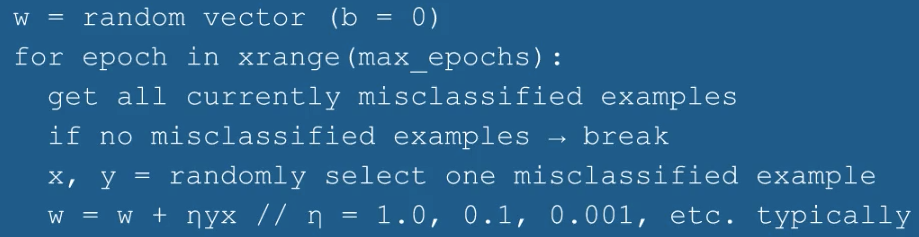

* the first thing we need to do is randomly initialize the weights
* it is common to make w gaussian distributed, and to set b = 0 to start 
* we won't consider the bias right now, since we will soon see that it can be absorbed into w (weights)
* Then we loop through the maximum number of iterations- we won't necessarily go through each iteration, since if we reach the point where we classify every correctly, we can just break out of the loop
* inside of the loop the first thing we do is retrieve all of the currently misclassified examples
* of course this means we need to a do a prediction
* we pick a misclassified sample at random, and update w (eta is a known as a learning rate)

# How does this process help get the optimal weights? 
* How does:
### $$w = w + \eta*yx$$
* help move w in the right direction?
* Well first we need to understand the geometry behind planes and lines
* recall that a vector that is perpendicular to a line, can define the line
* we call this the normal vector
* n = (a,b)

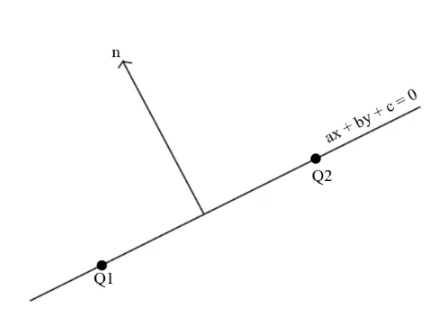

## Lines
* we refer to this normal vector as w

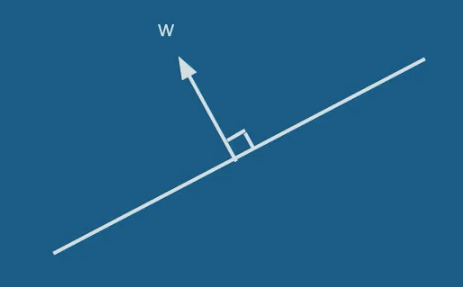

* the bias term tells us where we intersect the x2 (aka vertical/y) axis. 
* however, we will ignore it for now, since the bias term can also be absorbed into w
* How? By assuming we have another column of x that is always equal to 1
* Initial model:
### $$y = w_0+w_1x_1+w_2x_2, x_0 = 1$$
* New model:
### $$y = w_0x_0+w_1x_1+w_2x_2, x_0 = 1$$
* Hence, any model where we do not consider bias explicitly can be be assumed to contain a bias term anyway 

## Training - case 1
* So currently, we have some w pointing in some direction which is not yet correct
* The line (the classifying line) and its corresponding w are both shown in black

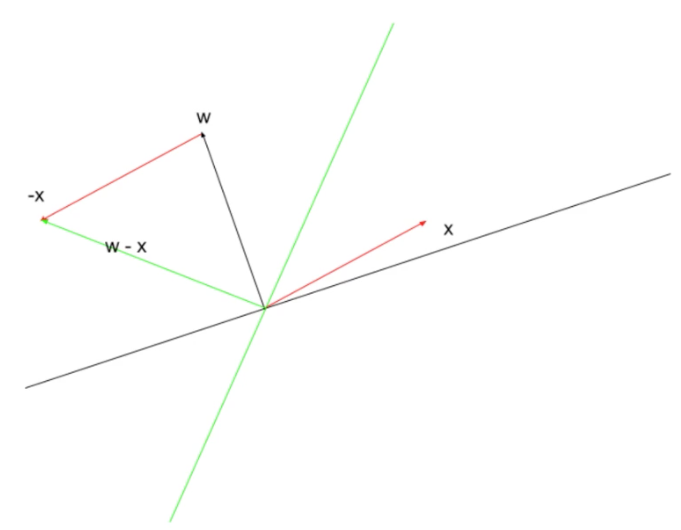

* We find an x which is not classified correctly, which is shown in red
* suppose w and x are both on the same side of the line
* then the dot product is greater than 0, because the angle is less than 90 degrees
* that means it should be classified as -1, but is mistakenly being classified as +1
* so we update w, which is equivalent to subtracting x from w, since y (the target) is minus 1
    * w = w + (y*x) = w + (-1*x) =  w - x
* the result is that this shifts the line, so that it is now facing a direction where it is either classifying x correctly, or the line is at least closer to x, so that the next time we move w maybe it will classify x correctly 
* in this particular picture, the new line in green classifies x correctly

## Training - case 2
* now lets consider the case where x is on the other side of the line from w

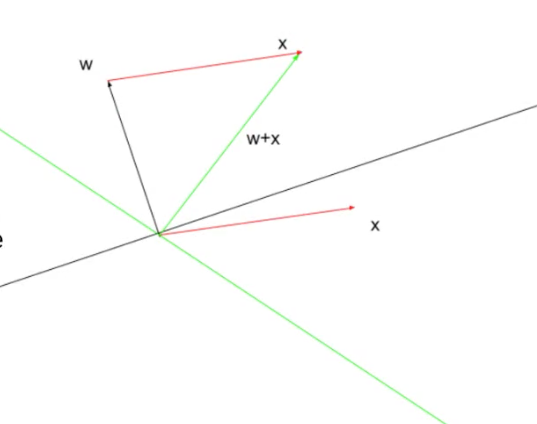

* so the black vector w, and the black line, correspond to our incorrect setting of w 
* so this means that the angle between x and w will be greater than 90 degrees, so the dot product will be negative 
* which means we predict -1, but the target is plus 1
* when we update, this is equivalent to adding x to w, since y is now plus 1 
* notice how this shifts the line so that we will either be able to classify x correctly, or we will be closer to being able to do so 
* in this example, shown in green, we are now classifying x correctly

# Summary
* we have introduced an iterative algorithm that can train a linear binary classifier
* we have seen how the update rule fixes w, so that it better predicts current misclassified samples and we have seen geometrically how it works 

---
# Perceptron in Code

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
%matplotlib inline

We are going to start by writing our own import data function, which creates linearly seperable data that we can plot. We use a uniformly distributed variable, it starts out distributed from 0 to 1, but then we multiply by 2 and subtract by 1, so it is uniformly distributed between -1 and +1. 

In [15]:
def get_data():
    w = np.array([-0.5, 0.5])       # data will be in 2 dimensions, so weights should be in two dimensions 
    b = 0.1
    X = np.random.random((300, 2))*2 - 1       
    Y = np.sign(X.dot(w) + b)    
    return X, Y

Define Perceptron Class.

In [20]:
class Perceptron:
    def fit(self, X, Y, learning_rate=1.0, epochs=1000):
        D = X.shape[1]                        # get dimensionality, shape of X
        self.w = np.random.randn(D)           # get w which is of size D
        self.b = 0 
        
        N = len(Y)                            # get length of Y
        costs = []                            # create cost array, starts empty
        
        for epoch in range(epochs):                # loop through epochs
            Yhat = self.predict(X)                 # get predictions 
            incorrect = np.nonzero(Y != Yhat)[0]   # get any samples index where prediction does not match target 
            if len(incorrect) == 0:                # if no incorrect predictions, then we break
                break
                
            i = np.random.choice(incorrect)        # grab a random sample from the incorrect predictions 
            self.w += learning_rate*Y[i]*X[i]      # use update rule
            self.b += learning_rate*Y[i]           # equivalent to treating x as 1
            
            c = len(incorrect) / float(N)          # get incorrect rate 
            costs.append(c)                        # append that to the costs 
            
            
        # print("final w: ", self.w, "final b:", self.b, "epochs:", (epochs + 1), "/", epochs)
        plt.plot(costs)
        plt.show()
        
    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)
    
    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)  

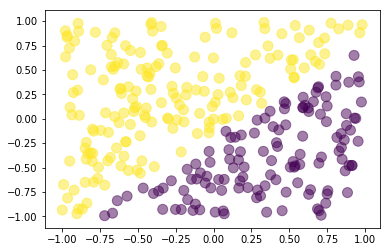

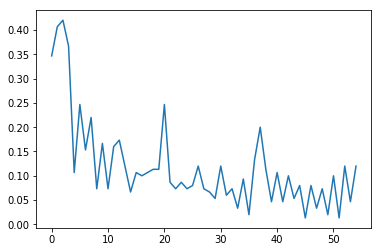

Training Time:  0:00:00.166746
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00.000158 Train size: 150
Test accuracy: 0.9933333333333333
Time to compute test accuracy: 0:00:00.000134 Test size: 150
-----------------------------------------------------------------------


In [21]:
if __name__ == '__main__':
    X, Y = get_data()
    plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
    plt.show()
    
    Ntrain = len(Y)//2
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    
    model = Perceptron()
    # set timer to see how long it takes knn to fit the training data
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print ("Training Time: ", (datetime.now() - t0))

    # now get training accuracy and time this as well
    t0 = datetime.now()
    print ("Train accuracy:", model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

    # now print test accuracy
    t0 = datetime.now()
    print ("Test accuracy:", model.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

    print('-----------------------------------------------------------------------')

---
# Perceptron for MNIST or XOR

In [24]:
def get_simple_xor():
    X = np.array([[0,0], [0,1],[1,0],[1,1]])
    Y = np.array([0,1,1,0])
    return X, Y

## First lets do MNIST

Reading in and transforming data...


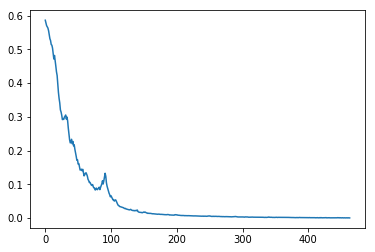

MNIST train accuracy:  1.0
------------------------------------------
XOR results:


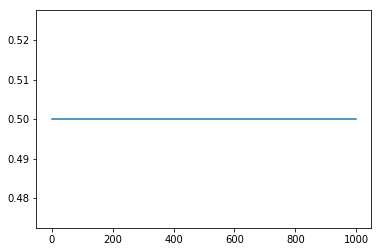

XOR accuracy: 0.5


In [25]:
def get_mnist(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('data/train.csv')
    data = df.as_matrix()
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

X, Y = get_mnist()
idx = np.logical_or(Y == 0, Y == 1)
X = X[idx]
Y = Y[idx]
Y[Y == 0] = -1             # perceptron uses -1 and +1 for targets, so swapping out 0 for -1 


model = Perceptron()
t0 = datetime.now()
model.fit(X, Y, learning_rate=10e-3)
print ("MNIST train accuracy: ", model.score(X, Y))

print('------------------------------------------')

print('XOR results:')
X, Y = get_simple_xor()
model.fit(X,Y)
t0 = datetime.now()
print ("XOR accuracy:", model.score(X ,Y))


# Disadvantage of Perceptron
Clearly we can see from the above plot that while the perceptron was able to perfectly learn the MNIST problem, not matter how hard it tried it would never be able to solve the XOR problem. This is because it is a linear classifier! 

---
# Perceptron Loss Function
* Lets now take a deeper look at perceptron training
* Note that this is not necessary to understand how the perceptron works - that can be understood fully by the geometry of the problem 
* This is going to make use of gradient descent!

# Recall
* In Machine Learning we often like to formulate a loss function, and then minimize this loss 
* Deep learning, logistic regression, k-means clustering, and gaussian mixture models all do this 
* sometimes this is done ad hoc
* it is entirely plausible that you could invent an algorithm to solve a problem, and only discover later that it actually optimizes a certain loss function, just out of coincedence 

# Loss Function
* The lost function for the perceptron is defined as follows:

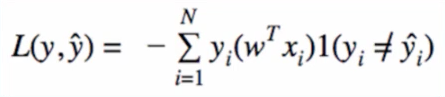

* above $\hat{y}$ is the prediction 
* so the 1 function here acts as a true or false checker
* if the argument is true, then it returns 1
* if the argument is false then we get 0
* In other words, the loss function only increases for any misclassified samples
* If if is classified correctly, then the contribution to the loss for that sample is zero
* Remember, $y_i$ is either +1 or -1, and for a sample to be misclassified, that means that $w^Tx_i$ must be of the opposite sign. Hence have:
### $$y_i*w^Tx_i = (sign)*(oppostite \; sign) = negative$$
* and then the outer negative (outside of the sum) makes the entire thing positve 

# Loss Function Geometry
* another fact is that the further x_i is away from the hyperplane, defined by w, the larger the loss is! 
* But why...? And why is this a desirable property?

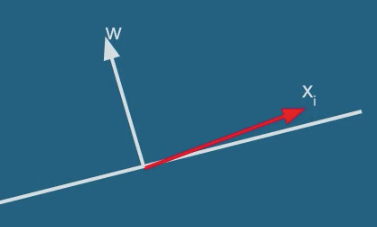

* imagine that xi is very close the the hyperplane, but is still classified wrong
* that means that the angle between xi and w is almost 90 degrees
* this then brings the dot product closer to 0 
* as a result, it is still classified wrong, but it is not very wrong- just a small nudge of w could make it right
* Now lets compare that to an xi that is nearly parallel to w, and is classified as wrong 

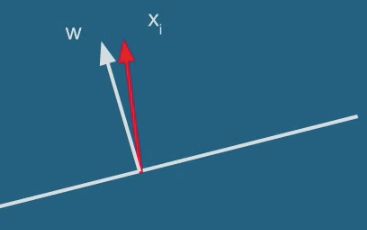

* That means that it is as far away from the hyper plane as it could be 
* and the angle between xi and w is almost 0
* so this hyperplane is not even close to being able to classify this point correctly, and a small nudge to change w won't work 
* the data point xi is in a very wrong place- in fact it is in the most wrong place that it could possibly be
* hence, $w^Tx_i$ is almost $|w||x_i|$,  the maximum value!
* therefore, when xi is very wrong it leads to a bigger loss!

# Gradient Descent

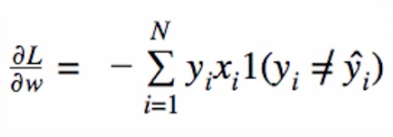

* By performing gradient descent we take small steps in the direction of dL/dw
* so we can see that the training algorithm that we implemented earlier is just **stochastic gradient descent**, given the loss function above 